In [19]:
import pandas as pd # pandas help in reading of the data and management of data
import numpy as np #mathematical computation
import matplotlib.pyplot as plt #Used for Plotting of data
import seaborn as sns 

In [3]:
df = pd.read_csv("/content/covid_vaccine_statewise.csv") #To read a csv file

In [4]:
df.head() #Head of the csv file i.e. first five elements 

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0


In [5]:
df.shape #It shows no. of rows and columns present

(6699, 18)

In [6]:
df.dtypes #It shows the data types present in the whole data

Updated On                              object
State                                   object
Total Doses Administered               float64
Total Sessions Conducted               float64
Total Sites                            float64
First Dose Administered                float64
Second Dose Administered               float64
Male(Individuals Vaccinated)           float64
Female(Individuals Vaccinated)         float64
Transgender(Individuals Vaccinated)    float64
Total Covaxin Administered             float64
Total CoviShield Administered          float64
Total Sputnik V Administered           float64
AEFI                                   float64
18-45 years (Age)                      float64
45-60 years (Age)                      float64
60+ years (Age)                        float64
Total Individuals Vaccinated           float64
dtype: object

In [7]:
df = df.drop(["Total Sputnik V Administered","AEFI","18-45 years (Age)","45-60 years (Age)","60+ years (Age)"],axis=1) #It is used to drop unnecessary data present in csv file

In [8]:
df.count() #The no. of rows present in that file

Updated On                             6699
State                                  6699
Total Doses Administered               6364
Total Sessions Conducted               6363
Total Sites                            6363
First Dose Administered                6363
Second Dose Administered               6363
Male(Individuals Vaccinated)           6363
Female(Individuals Vaccinated)         6363
Transgender(Individuals Vaccinated)    6363
Total Covaxin Administered             6363
Total CoviShield Administered          6363
Total Individuals Vaccinated           6363
dtype: int64

In [9]:
df.head() 

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,251280.0


In [10]:
duplicate_rows_df = df[df.duplicated()] #To find duplicate items present in dataset
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 13)


In [11]:
df.count()#Total no. of rows of that particular field

Updated On                             6699
State                                  6699
Total Doses Administered               6364
Total Sessions Conducted               6363
Total Sites                            6363
First Dose Administered                6363
Second Dose Administered               6363
Male(Individuals Vaccinated)           6363
Female(Individuals Vaccinated)         6363
Transgender(Individuals Vaccinated)    6363
Total Covaxin Administered             6363
Total CoviShield Administered          6363
Total Individuals Vaccinated           6363
dtype: int64

In [12]:
df = df.drop_duplicates()#To delete duplicate items

In [13]:
df.count()

Updated On                             6699
State                                  6699
Total Doses Administered               6364
Total Sessions Conducted               6363
Total Sites                            6363
First Dose Administered                6363
Second Dose Administered               6363
Male(Individuals Vaccinated)           6363
Female(Individuals Vaccinated)         6363
Transgender(Individuals Vaccinated)    6363
Total Covaxin Administered             6363
Total CoviShield Administered          6363
Total Individuals Vaccinated           6363
dtype: int64

In [14]:
print(df.isnull().sum())#To find any null value present 

Updated On                               0
State                                    0
Total Doses Administered               335
Total Sessions Conducted               336
Total Sites                            336
First Dose Administered                336
Second Dose Administered               336
Male(Individuals Vaccinated)           336
Female(Individuals Vaccinated)         336
Transgender(Individuals Vaccinated)    336
Total Covaxin Administered             336
Total CoviShield Administered          336
Total Individuals Vaccinated           336
dtype: int64


In [15]:
df = df.dropna() #Drop all the null values present
df.count()

Updated On                             6363
State                                  6363
Total Doses Administered               6363
Total Sessions Conducted               6363
Total Sites                            6363
First Dose Administered                6363
Second Dose Administered               6363
Male(Individuals Vaccinated)           6363
Female(Individuals Vaccinated)         6363
Transgender(Individuals Vaccinated)    6363
Total Covaxin Administered             6363
Total CoviShield Administered          6363
Total Individuals Vaccinated           6363
dtype: int64

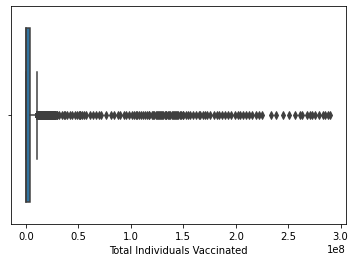

In [20]:
sns.boxplot(x=df["Total Individuals Vaccinated"]) #Boxplot is used to find range in which the data lies

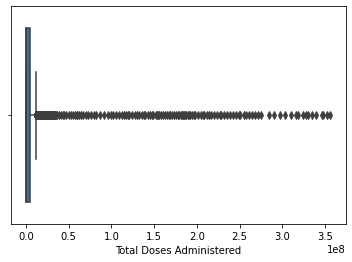

In [26]:
sns.boxplot(x=df["Total Doses Administered"]) 

In [22]:
def remove_outlier(col): #To remove unecessary space that is not to be used
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR= Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [23]:
lowage,upage=remove_outlier(df['Total Individuals Vaccinated'])
df['Total Individuals Vaccinated']=np.where(df['Total Individuals Vaccinated']>upage,upage,df['Total Individuals Vaccinated'])
df['Total Individuals Vaccinated']=np.where(df['Total Individuals Vaccinated']<lowage,lowage,df['Total Individuals Vaccinated'])

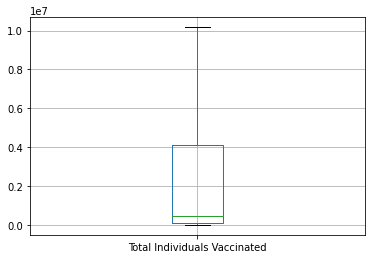

In [24]:
df.boxplot(column=["Total Individuals Vaccinated"])
plt.show()

In [25]:
df.corr() #To find the correlation

,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Individuals Vaccinated
Total Doses Administered,1.000000,0.927323,0.730636,0.999588,0.992115,0.993924,0.994730,0.982723,0.992649,0.999864,0.450079
Total Sessions Conducted,0.927323,1.000000,0.759688,0.932778,0.894516,0.931649,0.931999,0.921153,0.918302,0.927548,0.421645
Total Sites,0.730636,0.759688,1.000000,0.737251,0.694669,0.706150,0.717165,0.653534,0.679149,0.734515,0.428155
First Dose Administered,0.999588,0.932778,0.737251,1.000000,0.988110,0.994774,0.995654,0.983397,0.991730,0.999516,0.450842
Second Dose Administered,0.992115,0.894516,0.694669,0.988110,1.000000,0.980585,0.981063,0.970262,0.987052,0.991701,0.442388
Male(Individuals Vaccinated),0.993924,0.931649,0.706150,0.994774,0.980585,1.000000,0.999324,0.993268,0.992292,0.993049,0.439092
Female(Individuals Vaccinated),0.994730,0.931999,0.717165,0.995654,0.981063,0.999324,1.000000,0.990008,0.990400,0.994210,0.442128
Transgender(Individuals Vaccinated),0.982723,0.921153,0.653534,0.983397,0.970262,0.993268,0.990008,1.000000,0.990935,0.980626,0.418433
Total Covaxin Administered,0.992649,0.918302,0.679149,0.991730,0.987052,0.992292,0.990400,0.990935,1.000000,0.990653,0.436739
Total CoviShield Administered,0.999864,0.927548,0.734515,0.999516,0.991701,0.993049,0.994210,0.980626,0.990653,1.000000,0.450848
